In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
unw_corrected_tot=np.load('unw_corrected_tot_YEM_Slum_T12502_longer_TB_final.npy')
res_corrected_tot=np.load('res_corrected_tot_YEM_Slum_T12502_longer_TB_final.npy')

RMSE_min=np.load('RMSE_min_YEM_Slum_T12502_longer_TB_final.npy')
DPCI_max=np.load('DPCI_max_YEM_Slum_T12502_longer_TB_final.npy')

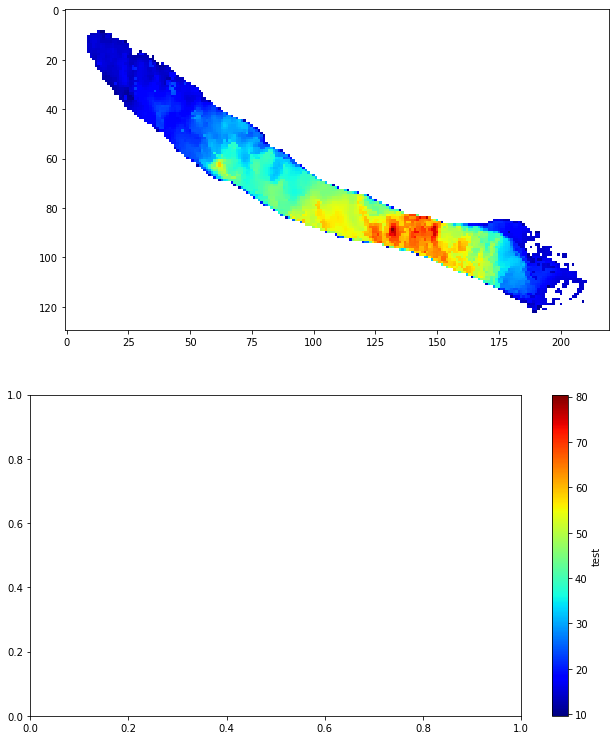

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(11, 13))
im0 = ax[0].imshow(unw_corrected_tot[76,:,:], cmap='jet')
fig.colorbar(im0,orientation='vertical',label='test')


In [4]:
print(np.shape(unw_corrected_tot))

(77, 130, 220)


In [5]:
ifg_dates=[20110812, 20110819,20120416,20120423,20120509,20120724,20120801,20130503,20130510,20131025,20140401,20140404,20150428,20150504,20150512, 20150629,20160401,20160408,20160616,20160623,20161020,20161027,20170331, 20170905,20171018,20171025,20171101,20180725,20180802,20181003,20181010, 20190528,20190610,20190715]
ifg_ids=['uav1','uav2','uav3', 'uav4','uav5', 'uav6', 'uav7','uav8','uav9', 'uav10','uav11','uav12','uav13', 'uav14','uav15', 'uav16', 'uav17','uav18','uav19', 'uav20','uav21','uav22','uav23', 'uav24','uav25','uav26', 'uav27','uav28','uav29', 'uav30','uav31','uav32','uav33', 'uav34' ]

In [6]:
# file=open("/home/lab/landslide_sg/T12502/T12502_unw_list", "r")
file=open("T12502_unw_list", "r")
unw_data=file.readlines()
first_dates = [dt.datetime.strptime(str(ifg_dates[(ifg_ids.index((d).split('_')[0]))]), "%Y%m%d").date() for d in unw_data]
second_dates = [dt.datetime.strptime(str(ifg_dates[(ifg_ids.index((d).split('_')[2]))]), "%Y%m%d").date() for d in unw_data]

In [15]:
print(first_dates[0])
print(second_dates[0])
print(ifg_dates[9])
print(ifg_dates[10])

2013-10-25
2014-04-01
20131025
20140401


In [7]:
Bt=[]
for i in range(0,len(unw_data)):
    Bt.append((second_dates[i]-first_dates[i]).days)

In [12]:
print(Bt)

[158, 161, 3, 6, 14, 62, 8, 56, 48, 277, 284, 7, 76, 83, 202, 209, 69, 76, 195, 202, 7, 126, 133, 7, 248, 255, 271, 119, 126, 281, 7, 162, 155, 158, 201, 208, 215, 43, 50, 57, 7, 14, 7, 266, 274, 8, 70, 77, 62, 69, 241, 248, 264, 7, 230, 243, 278, 13, 48, 35, 7, 23, 99, 107, 16, 92, 100, 76, 84, 8, 283, 290, 275, 282, 175, 7, 168]


In [8]:
unw_dict = {}
for i in range(0,len(unw_corrected_tot)):
    
    name = unw_data[i].split('_')[0].split('v')[1] + '_' + unw_data[i].split('_')[2].split('v')[1]
    
    key = 'unw_' + name
    unw_dict[key] = unw_corrected_tot[i].tolist()
    
    key = 'res_' + name
    unw_dict[key] = res_corrected_tot[i].tolist()
    
    key = 'DPSI_' + name
    unw_dict[key] = np.round(DPCI_max[i],2)
    
    key = 'RMSE_' + name
    unw_dict[key] = np.round(RMSE_min[i],2)
    
    key = 'Bt_' + name
    unw_dict[key] = Bt[i]  
    
    key = 'Dates_' + name
    unw_dict[key] = str(ifg_dates[(ifg_ids.index((unw_data[10]).split('_')[0]))])+'_'+str(ifg_dates[(ifg_ids.index((unw_data[10]).split('_')[2]))])
    
    val = 0
    if i in [23,30,40,42,45,53,60,69,75]:
        val = 1
        
    key = 'Ref_' + name
    unw_dict[key] = val

In [9]:
def show_me(num1_num2):
    nn = np.round(np.nanmax(unw_dict['unw_' + num1_num2])/(2*np.pi))
    fig, ax = plt.subplots(2, 1, figsize=(11, 13))
    im0 = ax[0].imshow(unw_dict['unw_' + num1_num2], cmap='jet')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].text(100, 10, 'ifg = ' + (unw_dict['Dates_' + num1_num2]), fontsize=14)
    ax[0].text(100, 18, 'Bt = ' + str(unw_dict['Bt_' + num1_num2]) + ' (days)', fontsize=14)
    ax[0].text(100, 34, 'DPSI = ' + str(unw_dict['DPSI_' + num1_num2]), fontsize=14)
    ax[0].text(100, 42, 'RMSE = ' + str(unw_dict['RMSE_' + num1_num2]), fontsize=14)
    
    result = 'Accepted'
    if unw_dict['DPSI_' + num1_num2]< 0.15 or unw_dict['RMSE_' + num1_num2]>1.65:
        result = 'Not Accepted'
    if unw_dict['Ref_' + num1_num2]:
        result = 'Reference ifg'
        
    ax[0].text(100, 54, 'Correction Status= ' + result, fontsize=14)
    

    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im0, cax=cax, orientation='vertical',label='UNW (rad)')
    
    im1 = ax[1].imshow(unw_dict['res_' + num1_num2], cmap='jet', vmin=-2*np.pi, vmax=2*np.pi)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical',label='Residual (rad)')
  

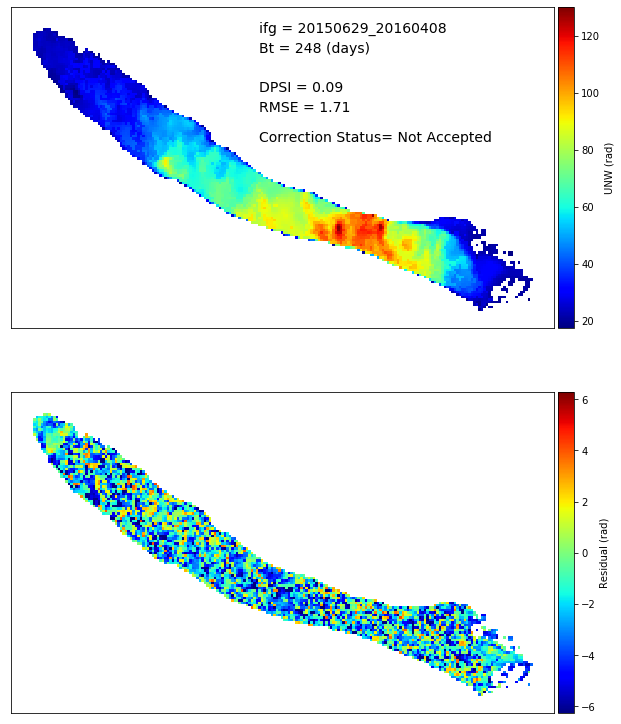

In [10]:
show_me('1_3') # give the name in "slc1_slc2" format 

## print(unw_data) will show you the list of ifgs in "slc1_slc2" format